<a href="https://colab.research.google.com/github/Odima-dev/Data-Science-and-Machine-Learning/blob/main/Creditinformationanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1: Understanding the content of the competition**

**What kind of company is Home Credit?**

Home Credit is a multinational consumer finance company that offers loans to the individuals with minimal or no credit record. They function in multiple countries and seek to increase the access of credit to underserved groups.

**What is expected in this competition?**

The participants will develop a machine learning model that can be used to predict the likelihood of a customer default on a loan with supplied details about the customer applications.

**What are the benefits companies can gain by predicting this?**

Modeling the default risk would allow Home Credit to lend more recklessly, lower the amount of financial loss, better target customers, and have more credit access and manage the risk meticulously.


In [3]:
# Problem 2: Understanding the overview of data
from google.colab import files

uploaded = files.upload()


Saving HomeCredit_columns_description.csv to HomeCredit_columns_description.csv
Saving application_train.csv to application_train.csv


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
app_train = pd.read_csv('application_train.csv')  # works fine
desc = pd.read_csv('HomeCredit_columns_description.csv', index_col=0, encoding='ISO-8859-1')

# Head of the data
display(app_train.head())

# Info
print(app_train.info())

# Description
display(app_train.describe())


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
#Check missing values
missing = app_train.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing_percent = (missing / len(app_train)) * 100

# Display missing values
missing_df = pd.DataFrame({'Missing Values': missing, 'Percent (%)': missing_percent})
display(missing_df.head(10))


,Missing Values,Percent (%)
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
COMMONAREA_MEDI,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953


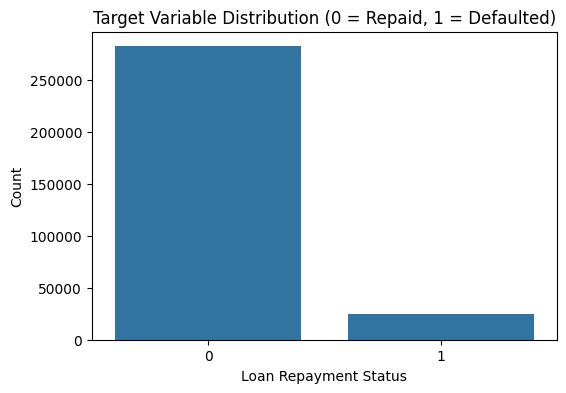

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


In [7]:
#Plotting the percentage of target classes
plt.figure(figsize=(6,4))
sns.countplot(data=app_train, x='TARGET')
plt.title("Target Variable Distribution (0 = Repaid, 1 = Defaulted)")
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count")
plt.show()

# Percentage
print(app_train['TARGET'].value_counts(normalize=True) * 100)


**Problem 3: Defining issues**

**As per the presented data concise picture, the following questions seem to be worth discussing:**

* What are the relations between income and credit amount with loan default?

* Does default probability depend upon the number of children or size of the family?

* Are there typical jobs where the threats of default are higher?

* Does the default rate vary across the education level?

* Do individuals with more credit lines (e.g. AMT_CREDIT, CNT_CREDIT_PROLONG) have a higher tendency of defaulting?

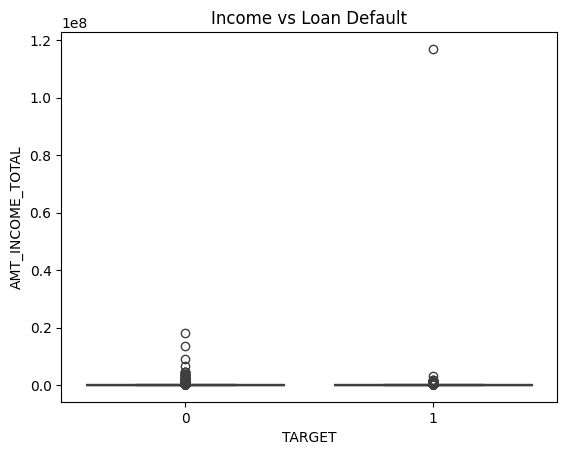

In [8]:
#Problem 4: Data exploration

# Graph 1: Income vs Target
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=app_train)
plt.title("Income vs Loan Default")
plt.show()


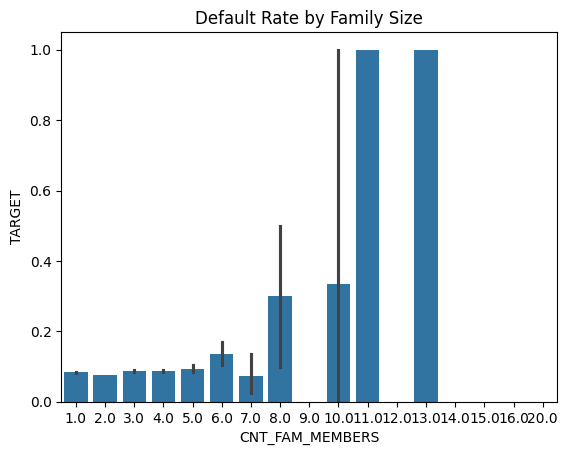

In [9]:
# Graph 2: Family Size and Default Rate
sns.barplot(x='CNT_FAM_MEMBERS', y='TARGET', data=app_train)
plt.title("Default Rate by Family Size")
plt.show()


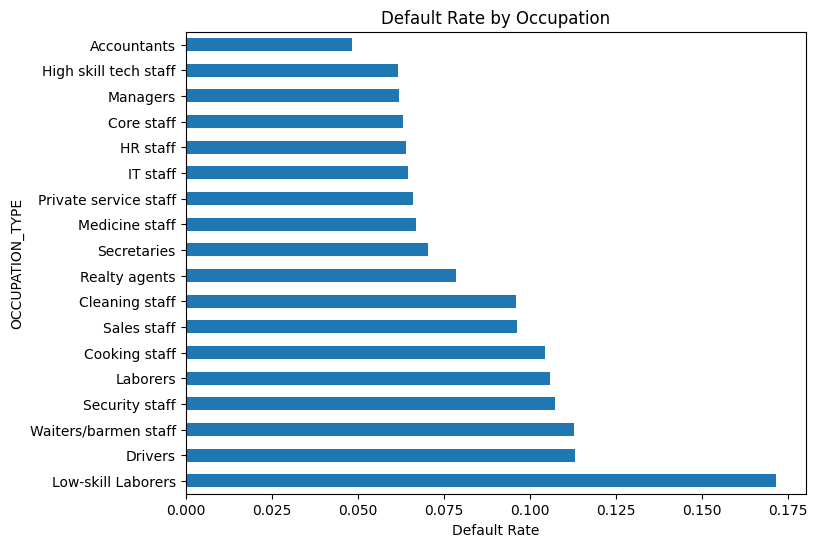

In [10]:
# Graph 3: Occupation vs Default Rate
occ_default = app_train.groupby('OCCUPATION_TYPE')['TARGET'].mean().sort_values(ascending=False)
occ_default.plot(kind='barh', figsize=(8,6))
plt.title("Default Rate by Occupation")
plt.xlabel("Default Rate")
plt.show()


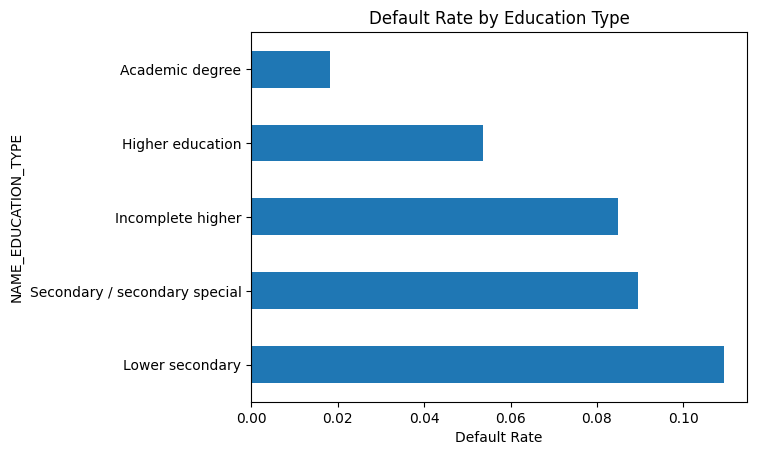

In [11]:
# Graph 4: Education vs Default Rate
edu_default = app_train.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().sort_values(ascending=False)
edu_default.plot(kind='barh')
plt.title("Default Rate by Education Type")
plt.xlabel("Default Rate")
plt.show()


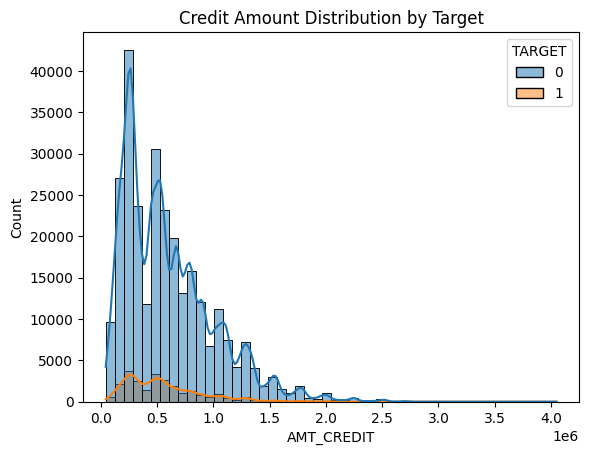

In [13]:
# Graph 5: Credit Amount Distribution
sns.histplot(data=app_train, x='AMT_CREDIT', hue='TARGET', kde=True, bins=50)
plt.title("Credit Amount Distribution by Target")
plt.show()
